In [2]:
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline  
inv = np.linalg.inv
plt.style.use('ggplot')

In [3]:
# import data
with open('../hw1/online_news_popularity.csv', 'r') as f:
    reader = csv.reader(f)
    a = list(reader)
    labels = a[0]
    data = np.array(a[1:])
data.shape

(39644, 61)

In [4]:
# convert the data into a convenient array
data = data[:,1:]
arrToFloat = np.vectorize(float)
data = arrToFloat(data)
shares = np.log(data[:,-1])

In [5]:
# split data into training and test data
dataRatio = .1
trainingrows = int(data.shape[0]*dataRatio)
trdata = data[0:trainingrows, :]
trshares = shares[0:trainingrows]
tstdata = data[trainingrows:, :]
tstshares = shares[trainingrows:]

In [120]:
# rename and normalize data
X = trdata / trdata.sum(axis = 1)[:, np.newaxis]
y = trshares

# define learning parameters
wlrn = 2.5e-5
regconst = 10000000.
iters = 1000

# gradient function
def grad(weights, regconst):
    return 2 * X.T @ X @ weights - 2 * y.T @ X + regconst * np.sign(weights)

# threshold the gradient
def prox(weights, regconst):
    update = weights - wlrn * grad(weights, regconst)
    update[abs(update) < wlrn] = 0
    update[update > wlrn] -= wlrn
    update[update < wlrn] += wlrn
    return update

def objective(weights, regconst):
    error = X @ weights - y
    return (error.T @ error + regconst * sum(abs(weights)))/y.shape[0]

def grad_descent(regconst, iters = 100, verbose = False):
    # initialize weights randomly
    weights = np.random.randn(trdata.shape[1])
    
    # initialize weights with linear regression closed form
    # weights = np.linalg.inv(X.T @ X) @ X.T @ y
    
    regconst /= y.shape[0]
    
    objectives = []
    # run gradient descent
    for i in range(iters):
        # update weights
        weights = prox(weights, regconst)

        objectives += [objective(weights, regconst)]
        if i % (iters/10) == 0 and verbose:
            print(objectives[i]) 
    return weights, objectives

objectives = grad_descent(regconst, iters, True)[1]

76.8653768626
13.5000299043
13.1533670812
13.0521511153
13.1193377912
13.0835120584
13.1010732179
13.1464740302
13.1496918806
13.0874664725


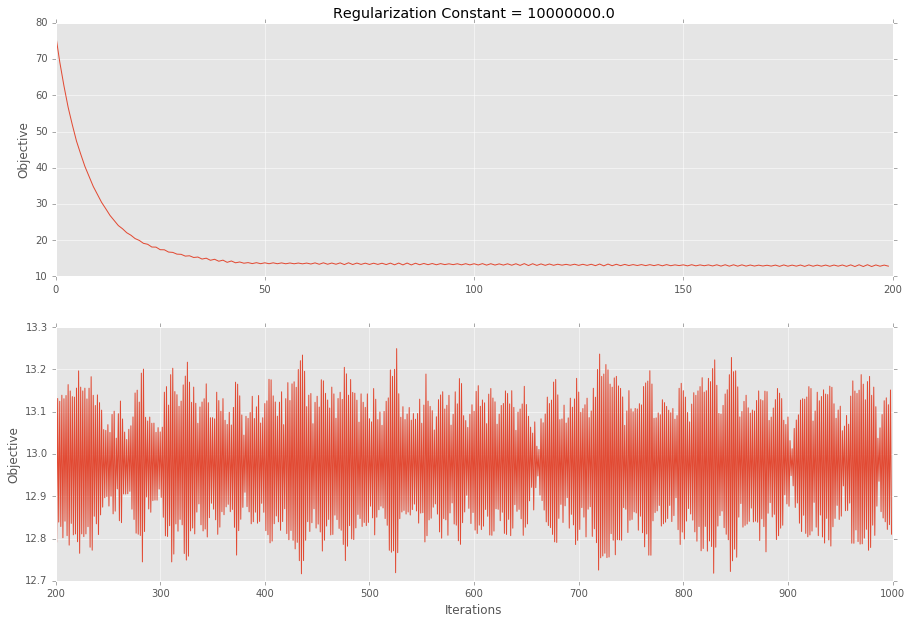

In [121]:
plt.figure(figsize = (15, 10))
plt.subplot(211)
plt.plot(objectives[0:200])
plt.ylabel("Objective")
plt.title("Regularization Constant = " + str(regconst))         
plt.subplot(212)
plt.plot(list(range(200, len(objectives))), objectives[200:])
plt.ylabel("Objective")
plt.xlabel("Iterations")

In [117]:
iterations = 1000
num_regs = 100

optweights = np.zeros((num_regs, 60))
invregs = np.linspace(1e-9,.000001, num_regs)

i = 0
for invreg in invregs:
    # initialize weights randomly
    optweights[i] = grad_descent(1./invreg)[0]
    i += 1
print('done')

done


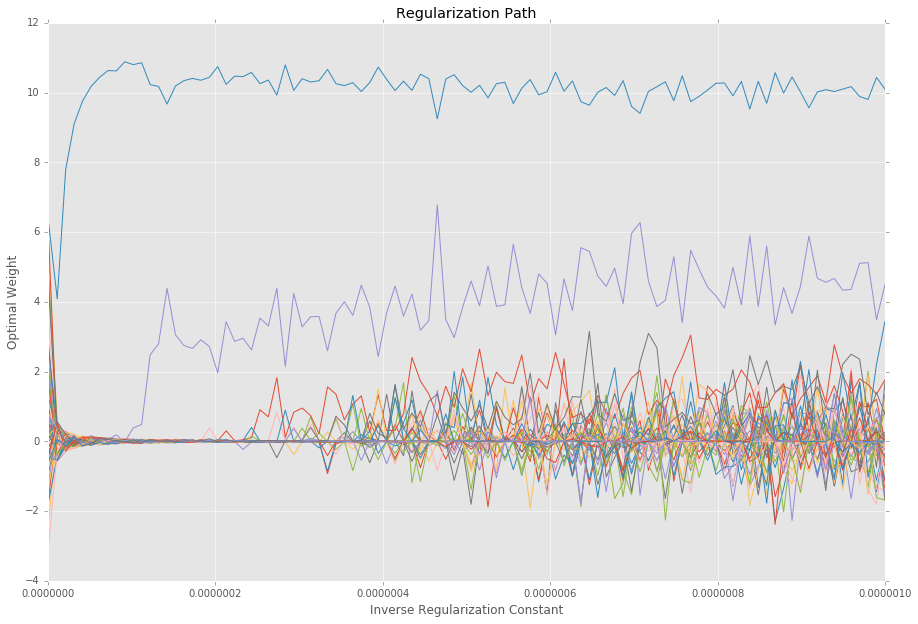

In [119]:
plt.figure(figsize = (15,10))
plt.plot(invregs, optweights)
plt.xlabel("Inverse Regularization Constant")
plt.ylabel("Optimal Weight")
plt.title("Regularization Path")

In [130]:
means = np.mean(optweights, axis = 0)

In [133]:
relevant_features = []
for i in range(5):
    relevant_features += [np.argmax(abs(means))]
    means[relevant_features[i]] = 0

In [134]:
relevant_features

[22, 23, 28, 59, 29]

In [136]:
for r in relevant_features:
    print(labels[r])

 kw_min_max
 kw_max_max
 self_reference_min_shares
 abs_title_sentiment_polarity
 self_reference_max_shares
